# SF-DAT-21 | Codealong 06 | Answer Key

## Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06-starter.csv'), index_col = 'ID')

df = read_dataset()

## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

In [3]:
def scale_variables(df):
    df.SalePrice = df.SalePrice / (10 ** 6) # Sale price in $M
    df.Size = df.Size / (10 ** 3) # Size in 1,000 sqft
    df.LotSize = df.LotSize / (10 ** 3) # Lot size in 1,000 sqft

scale_variables(df)

### `SalePrice` as a function of `Size`

In [4]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Tue, 15 Mar 2016   Prob (F-statistic):           2.67e-58
Time:                        23:07:24   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`SalePrice [$M] = 0.155 + 0.750 * Size [1,000 sqft]` (the slope is significant but not the intercept)

### Model's parameters

In [5]:
model.params

Intercept    0.155052
Size         0.749728
dtype: float64

In [6]:
type(model.params)

pandas.core.series.Series

In [7]:
model.params['Intercept']

0.15505177276001417

### t-values

In [8]:
model.tvalues

Intercept     1.842394
Size         17.245775
dtype: float64

### p-values

In [9]:
model.pvalues

Intercept    6.572416e-02
Size         2.667697e-58
dtype: float64

### Confidence Intervals

In [10]:
model.conf_int(cols = [0, 1])

,0,1
Intercept,-0.010102,0.320205
Size,0.664415,0.835041


In [11]:
type(model.conf_int(cols = [0, 1]))

pandas.core.frame.DataFrame

## Part A2 - Simple Linear Regression

### `SalePrice` as a function of `Size` without `Intercept`

In [12]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 15 Mar 2016   Prob (F-statistic):          7.83e-177
Time:                        23:07:24   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`SalePrice [$M] = 0.818 * Size [1,000 sqft]`

### Drop outliers

In [13]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.SalePrice.quantile(.25)
    Q2 = df.SalePrice.quantile(.5)
    Q3 = df.SalePrice.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.SalePrice < Q1 - 1.5 * IQR) | (df.SalePrice > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [14]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 15 Mar 2016   Prob (F-statistic):           1.41e-45
Time:                        23:07:24   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`SalePrice [$M] = 0.708 + 0.278 * Size [1,000 sqft]` (without the outliers, the intercept is now significant)

## Part B - How to check modeling assumptions?

### `.plot_regress_exog()`

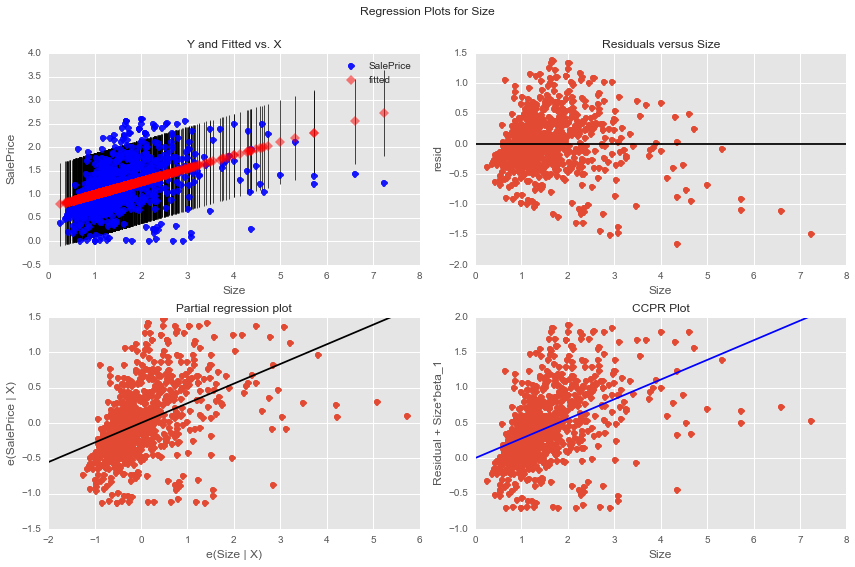

In [15]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model, 'Size', fig = figure)

## Part C1 - How to check normality assumption?

### Histogram (e.g., residuals)

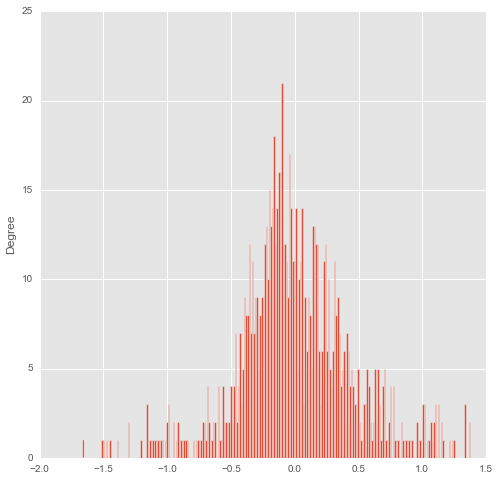

In [16]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

plt.show()

### q-q plot (e.g., residuals) against a normal distribution

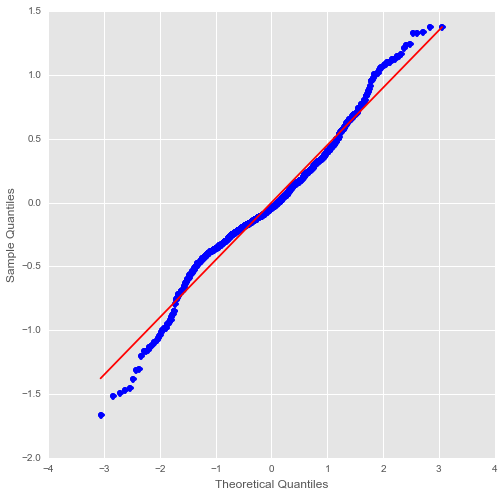

In [17]:
figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(model.resid, line = 's', ax = ax)

plt.show()

## Part C2 - How to check normality assumption?

### q-q plot of two normal distributions

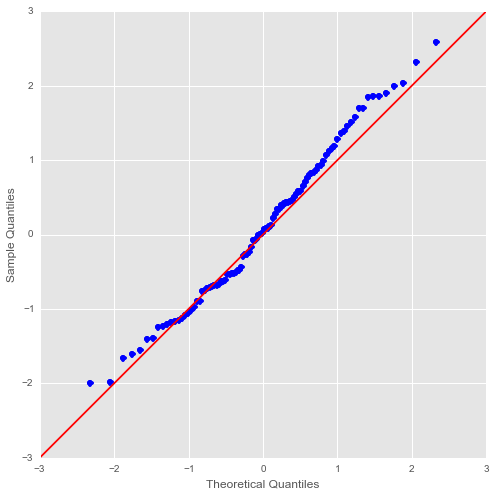

In [18]:
normal_array = np.random.normal(0, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

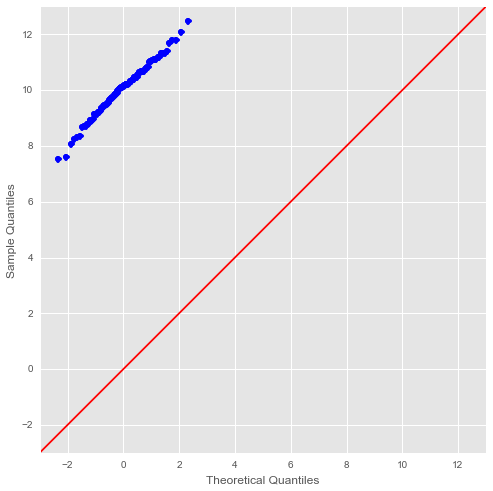

In [19]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

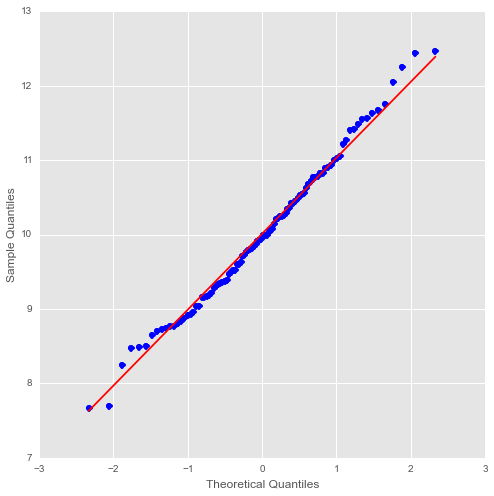

In [20]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = 's', ax = ax)
plt.show()

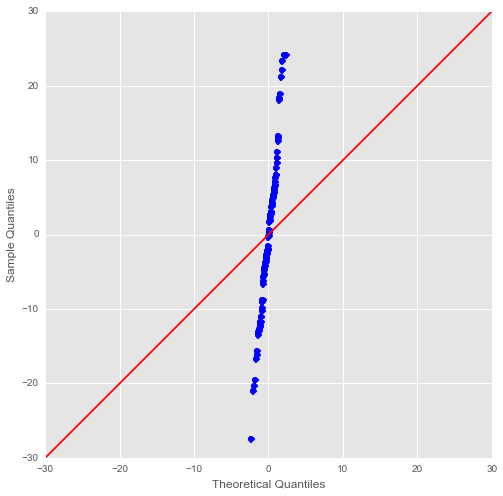

In [21]:
normal_array = np.random.normal(0, 10, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

## Part D - Inference and Fit

In [22]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

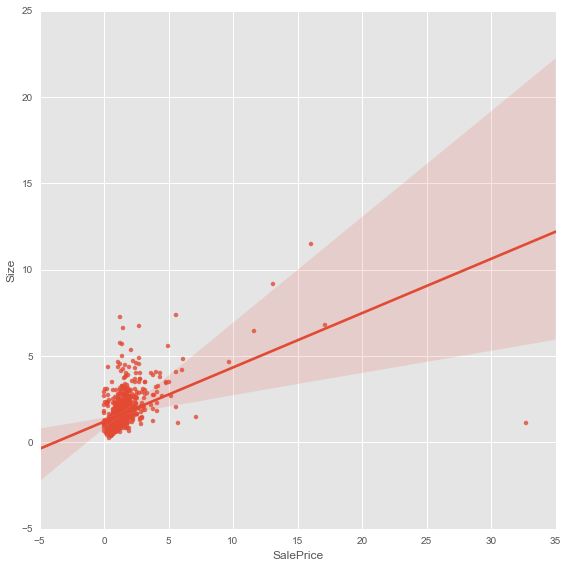

In [23]:
sns.lmplot('SalePrice', 'Size', df, size = 8)

### `SalePrice` as a function of `Size` after dropping the "worst" outlier

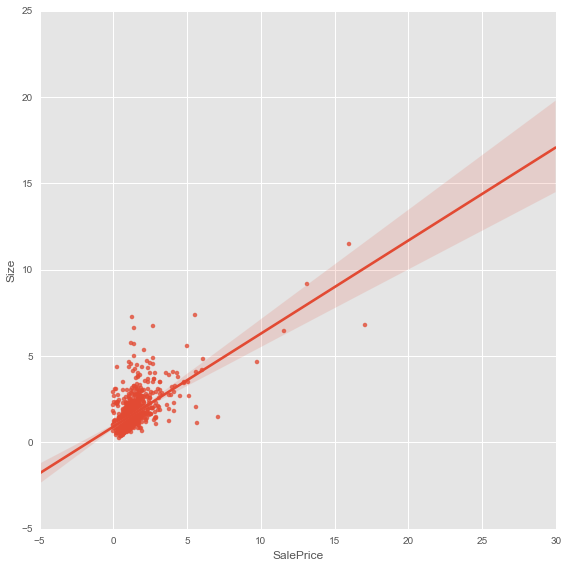

In [24]:
subset_df = df[df.SalePrice < df.SalePrice.max()]

sns.lmplot('SalePrice', 'Size', subset_df, size = 8)

## Part E - R<sup>2</sup>

### `SalePrice` as a function of `Size`

In [25]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 15 Mar 2016   Prob (F-statistic):          7.83e-177
Time:                        23:07:28   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R<sup>2</sup>

In [26]:
model.rsquared

0.56506068149064215

In [27]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # dropping outliers (function defined above)
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

With outliers:
- SalePrice ~     Size; R^2 = 0.2355931716
- SalePrice ~ 0 + Size; R^2 = 0.565060681491

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933

Without outliers:
- SalePrice ~     Size; R^2 = 0.199855535471
- SalePrice ~ 0 + Size; R^2 = 0.796063918194


## Part F - Multiple Linear Regression

In [28]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

In [29]:
model = smf.ols(formula = 'SalePrice ~ Size + BedCount', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                Tue, 15 Mar 2016   Prob (F-statistic):          8.01e-144
Time:                        23:07:28   Log-Likelihood:                -1026.2
No. Observations:                 819   AIC:                             2058.
Df Residuals:                     816   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1968      0.068      2.883      0.004         0.063     0.331
Size           1.2470      0.045     27.531      0.000         1.158     1.336
BedCount      -0.3022      0.034     -8.839      0.000        -0.369    -0.235
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part G - Multicollinearity

### Transforming Variables (cont.)

In [30]:
df[ ['SizeLog', 'LotSizeLog'] ] = df[ ['Size', 'LotSize'] ].apply(np.log10)
df[ ['SizeSqrt', 'LotSizeSqrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.sqrt)
df[ ['SizeSquare', 'LotSizeSquare'] ] = df[ ['Size', 'LotSize'] ].apply(np.square)

In [31]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,LotSizeLog,SizeSqrt,LotSizeSqrt,SizeSquare,LotSizeSquare
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0,1,...,NaN,0.741620,NaN,0.302500,NaN
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0,NaN,...,0.386499,1.195826,1.560449,2.044900,5.929225
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0,2,...,0.593286,1.428286,1.979899,4.161600,15.366400
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0,1,...,NaN,1.029563,NaN,1.123600,NaN
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0,2,...,NaN,1.139737,NaN,1.687401,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1,NaN,...,NaN,0.513809,NaN,0.069696,NaN
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0,1,...,NaN,0.831264,NaN,0.477481,NaN
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0,3,...,0.361539,1.318332,1.516245,3.020644,5.285401


### Multicollinearity

In [32]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeSquare' ] ].corr()

,Size,SizeLog,SizeSqrt,SizeSquare
Size,1.000000,0.914413,0.976180,0.901129
SizeLog,0.914413,1.000000,0.979376,0.676663
SizeSqrt,0.976180,0.979376,1.000000,0.794131
SizeSquare,0.901129,0.676663,0.794131,1.000000


In [33]:
model = smf.ols(formula = 'SalePrice ~ Size + SizeLog + SizeSqrt + SizeSquare', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     94.03
Date:                Tue, 15 Mar 2016   Prob (F-statistic):           1.57e-67
Time:                        23:07:29   Log-Likelihood:                -1658.3
No. Observations:                 967   AIC:                             3327.
Df Residuals:                     962   BIC:                             3351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.7533      8.789     -0.199      0.842       -19.000    15.494
Size          -1.9104      2.744     -0.696      0.487        -7.296     3.475
SizeLog       -0.0639      7.207     -0.009      0.993       -14.207    14.079
SizeSqrt       4.5018     11.405      0.395      0.693       -17.880    26.884
SizeSquare     0.1924      0.076      2.520      0.012         0.043     0.342
==============================================================================
Omnibus:                     1898.623   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4168986.546
Skew:                          14.377   Prob(JB):                         0.00
Kurtosis:                     323.380   Cond. No.                     3.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part H - Adjusted R<sup>2</sup>

In [34]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

R^2 = 0.780097143233 (original model)


In [35]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(len(df))

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [36]:
print 'Model with noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj

Model with noise:
-          R^2 = 0.833631361349
- Adjusted R^2 = 0.779715598823
